In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [2]:
data=pd.read_excel("CARGO_FOTP_DATASET.xlsx")

In [3]:
df=data.copy()

GOAL : Delay Prediction for cargo flights, Metric : %95 


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99546 entries, 0 to 99545
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FLT_NO               99546 non-null  object
 1   ACT_CUS_FLE          99546 non-null  object
 2   FLEET                99546 non-null  object
 3   FLEET_FAM            99546 non-null  object
 4   FLEET_FAM_GRP        99546 non-null  object
 5   FLEET_BODY_TYP       99546 non-null  object
 6   FLT_TYP              99546 non-null  object
 7   LEG_DEP_AP           99546 non-null  object
 8   LEG_DEP_GMT_DT       99546 non-null  int64 
 9   LEG_DEP_GMT_TM       99546 non-null  int64 
 10  LEG_DEP_CNTRY_COD    99512 non-null  object
 11  LEG_DEP_RGN_COD      95771 non-null  object
 12  LEG_ARR_AP           99546 non-null  object
 13  LEG_ARR_GMT_DT       99546 non-null  int64 
 14  LEG_ARR_GMT_TM       99546 non-null  int64 
 15  LEG_ARR_CNTRY_COD    99512 non-null  object
 16  LEG_

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY2_SUB_CODE,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210509,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210512,1526,...,NaN,NaN,NaN,?,?,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210516,1209,...,NaN,NaN,NaN,?,?,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210519,1528,...,NaN,NaN,NaN,?,?,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210523,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0


In [5]:
df.describe()

,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
count,9.954600e+04,99546.000000,9.954600e+04,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000
mean,2.019249e+07,1201.375203,2.019250e+07,1208.110803,112.058486,12.377192,2.249915,0.353264,127.038856
std,1.289824e+04,668.607877,1.289884e+04,666.799934,277.712802,67.957361,24.556694,8.632271,297.532552
min,2.017010e+07,0.000000,2.017010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.018083e+07,618.000000,2.018083e+07,646.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019112e+07,1235.000000,2.019112e+07,1226.000000,14.000000,0.000000,0.000000,0.000000,20.000000
75%,2.020093e+07,1757.000000,2.020093e+07,1757.000000,94.000000,7.000000,0.000000,0.000000,116.000000
max,2.021063e+07,2359.000000,2.021070e+07,2359.000000,7596.000000,5362.000000,2880.000000,1159.000000,7596.000000


<AxesSubplot:>

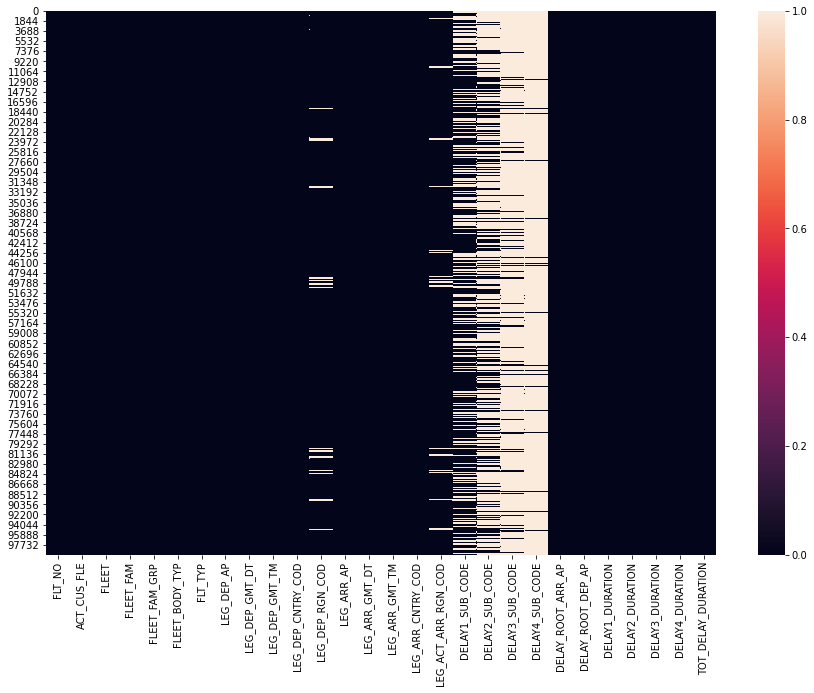

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [7]:
df.isna()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY2_SUB_CODE,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99541,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
99542,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
99543,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
99544,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


HEDEF 
* Ayları mevsimsel olarak kodlama
* Saatleri gün dilimlerine bölme (06-12 sabah, öğle, akşam, gece )
* Hedef değişkenini oluşturma 
* Encoding 
* X_train, X_test 



In [8]:
df['DELAYED'] = [1 if x>0 else 0 for x in df['TOT_DELAY_DURATION']]

In [9]:
df["LEG_DEP_GMT_DT"] = pd.to_datetime(df["LEG_DEP_GMT_DT"],format='%Y%m%d') 

In [10]:
df['LEG_DEP_GMT_DT'] = df['LEG_DEP_GMT_DT'].apply(lambda time: time.month)

In [11]:
df["LEG_ARR_GMT_DT"] = pd.to_datetime(df["LEG_ARR_GMT_DT"],format='%Y%m%d') 

In [12]:
df['LEG_ARR_GMT_DT'] = df['LEG_ARR_GMT_DT'].apply(lambda time: time.month)

In [13]:
df.shape

(99546, 29)

Target Variable : Delay 
Size : (99546, 29)
Variables: object -->19, int64 -->10
Missing Values 

<AxesSubplot:ylabel='None'>

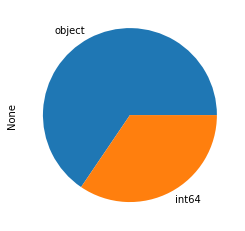

In [14]:
df.dtypes.value_counts().plot.pie()

In [15]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

FLT_NO                 0.000000
DELAY4_DURATION        0.000000
DELAY3_DURATION        0.000000
DELAY2_DURATION        0.000000
DELAY1_DURATION        0.000000
DELAY_ROOT_DEP_AP      0.000000
DELAY_ROOT_ARR_AP      0.000000
TOT_DELAY_DURATION     0.000000
LEG_ARR_GMT_DT         0.000000
LEG_ARR_AP             0.000000
LEG_ARR_GMT_TM         0.000000
DELAYED                0.000000
LEG_DEP_GMT_TM         0.000000
LEG_DEP_GMT_DT         0.000000
LEG_DEP_AP             0.000000
ACT_CUS_FLE            0.000000
FLEET                  0.000000
FLEET_FAM              0.000000
FLEET_FAM_GRP          0.000000
FLT_TYP                0.000000
FLEET_BODY_TYP         0.000000
LEG_ARR_CNTRY_COD      0.000342
LEG_DEP_CNTRY_COD      0.000342
LEG_DEP_RGN_COD        0.037922
LEG_ACT_ARR_RGN_COD    0.037942
DELAY1_SUB_CODE        0.363119
DELAY2_SUB_CODE        0.638891
DELAY3_SUB_CODE        0.898077
DELAY4_SUB_CODE        0.984570
dtype: float64

In [16]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.6]]

In [17]:
df.shape

(99546, 26)

Visualisation of Target Variable 
%63 delayed 
%36 non delayed 

In [18]:
df["DELAYED"].value_counts(normalize=True)

1    0.636881
0    0.363119
Name: DELAYED, dtype: float64

Histogramme 

/Users/zehraballi/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


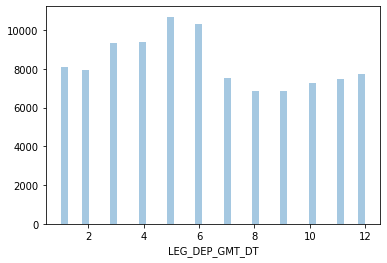

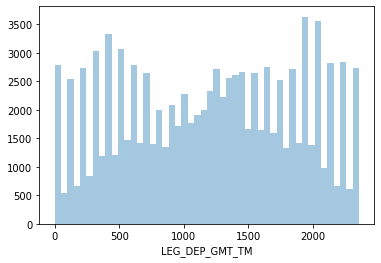

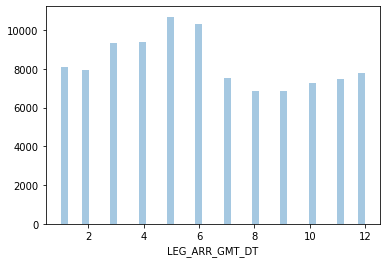

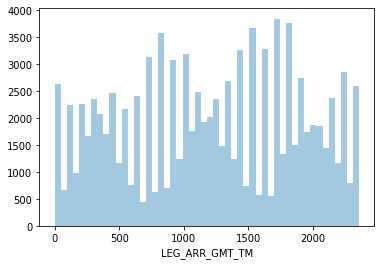

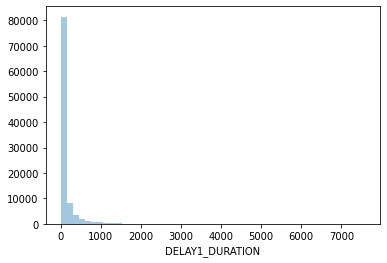

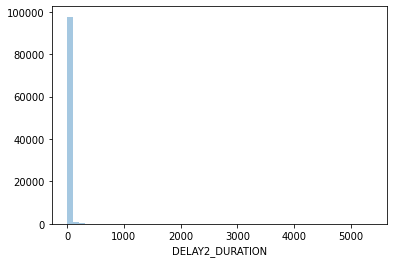

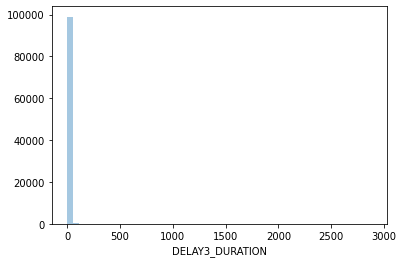

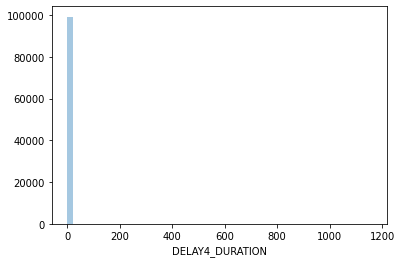

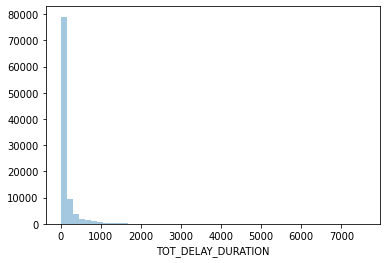

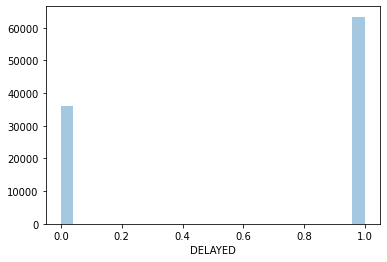

In [19]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col],kde=False)
    

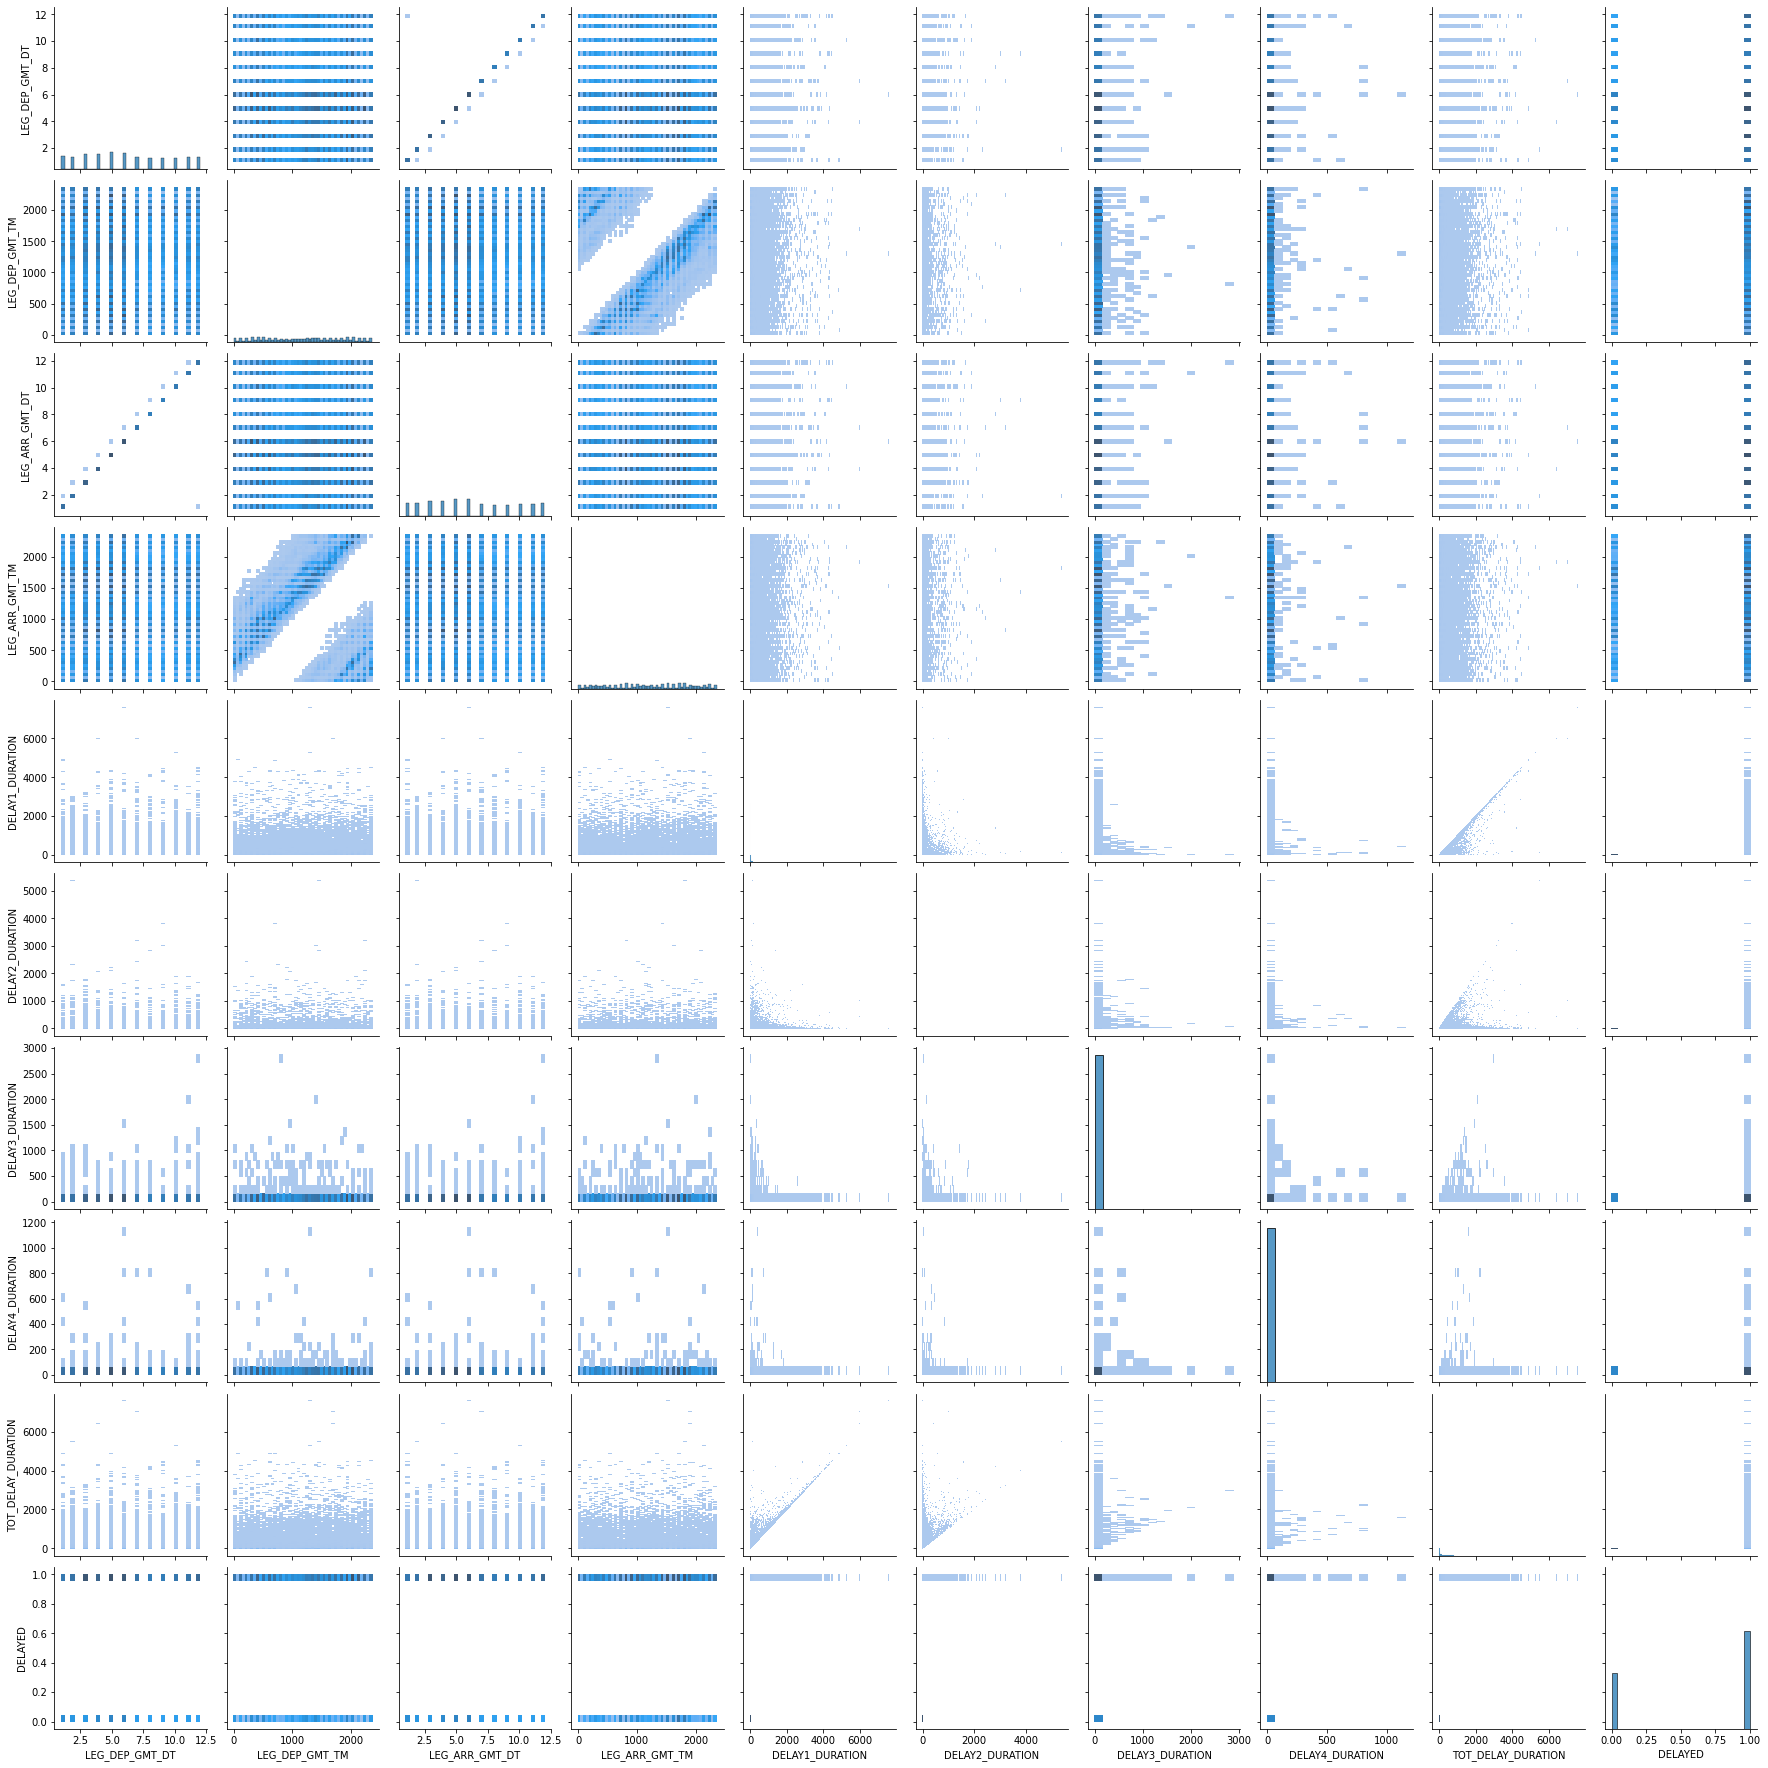

In [20]:
sns.pairplot(df,kind='hist')

In [21]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50}{df[col].nunique()}')

FLT_NO--------------------------------------------712
ACT_CUS_FLE---------------------------------------29
FLEET---------------------------------------------17
FLEET_FAM-----------------------------------------10
FLEET_FAM_GRP-------------------------------------8
FLEET_BODY_TYP------------------------------------2
FLT_TYP-------------------------------------------2
LEG_DEP_AP----------------------------------------202
LEG_DEP_CNTRY_COD---------------------------------111
LEG_DEP_RGN_COD-----------------------------------10
LEG_ARR_AP----------------------------------------203
LEG_ARR_CNTRY_COD---------------------------------111
LEG_ACT_ARR_RGN_COD-------------------------------10
DELAY1_SUB_CODE-----------------------------------353
DELAY_ROOT_ARR_AP---------------------------------76
DELAY_ROOT_DEP_AP---------------------------------65


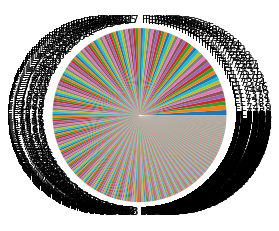

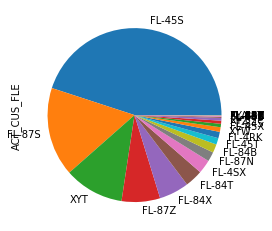

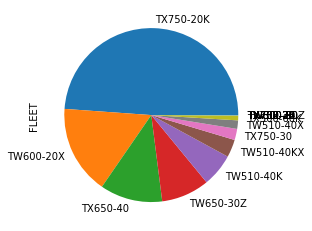

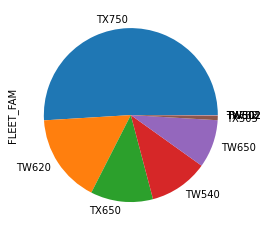

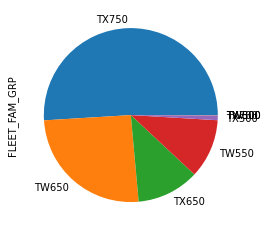

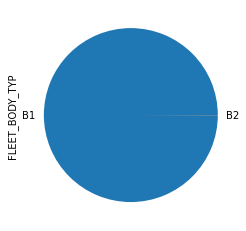

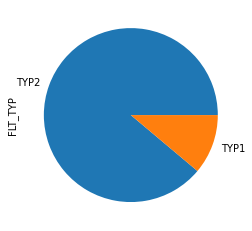

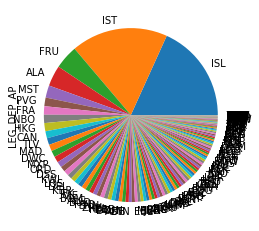

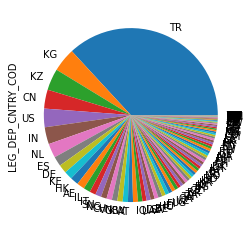

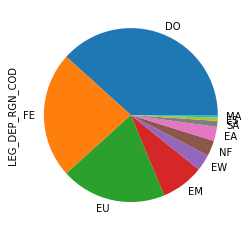

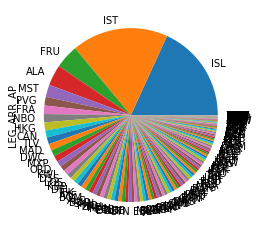

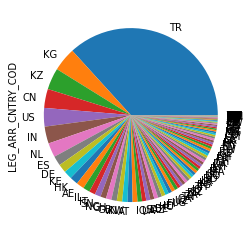

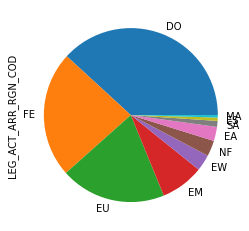

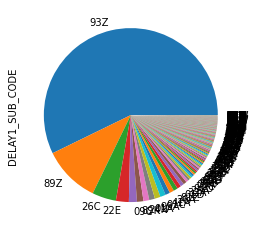

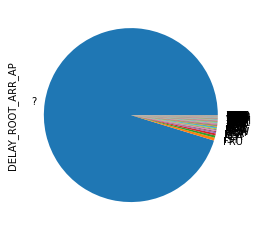

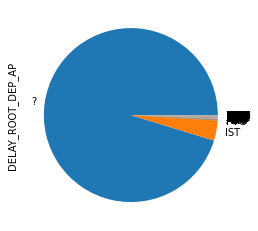

In [22]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [23]:
df_delayed=df[df['DELAYED']==1]
df_nondelayed=df[df['DELAYED']==0]

In [24]:
df_delayed.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
5,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1717,...,FE,64D,?,?,107,0,0,0,107,1
7,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,2208,...,FE,93Z,?,?,25,13,5,0,43,1
9,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,2137,...,FE,89Z,?,?,12,0,0,0,12,1
10,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,209,...,FE,56B,?,?,77,7,0,0,84,1
11,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,MAA,5,2145,...,FE,89Z,?,?,20,0,0,0,20,1


In [25]:
#df["LEG_DEP_GMT_TM"] = pd.to_datetime(df["LEG_DEP_GMT_TM"],format='%H%m') 
#df['LEG_DEP_GMT_TM'] = df['LEG_DEP_GMT_TM'].apply(lambda time: time.hour)

In [26]:
df.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1205,...,FE,NaN,?,?,0,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1526,...,FE,NaN,?,?,0,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1209,...,FE,NaN,?,?,0,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1528,...,FE,NaN,?,?,0,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,1205,...,FE,NaN,?,?,0,0,0,0,0,0


In [27]:
#df['LEG_DEP_GMT_TM_H'] = df['LEG_DEP_GMT_TM'].apply(lambda x: x.split(str(df['LEG_DEP_GMT_TM']),2))

In [28]:
df['LEG_ARR_GMT_TM'] = df['LEG_ARR_GMT_TM'].apply(lambda x: x//100)

In [29]:
df['LEG_DEP_GMT_TM'] = df['LEG_DEP_GMT_TM'].apply(lambda x: x//100)

In [30]:
df.tail()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
99541,FL7848,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,2,5,...,FE,01C,?,?,119,0,0,0,119,1
99542,FL7848,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,4,...,FE,01C,?,?,56,0,0,0,56,1
99543,FL7848,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,3,...,FE,93Z,?,?,20,0,0,0,20,1
99544,FL7848,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,6,...,FE,01C,?,?,215,6,0,0,221,1
99545,FL7848,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,3,3,...,FE,93Z,?,?,45,0,0,0,45,1


In [31]:
#df=df.drop('LEG_DEP_GMT_TM_H',inplace=True,axis=1)

<AxesSubplot:>

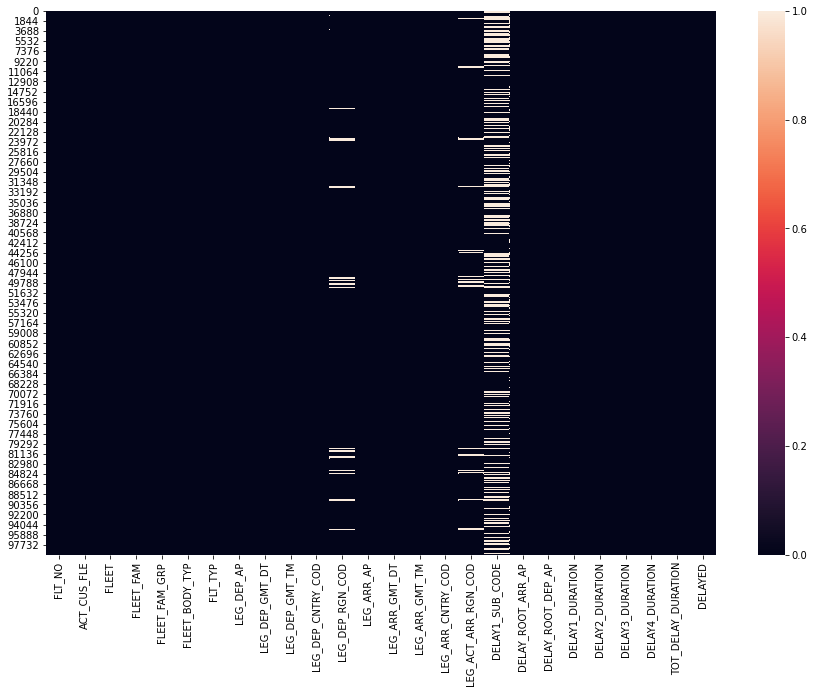

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [33]:
df.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,NaN,?,?,0,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,FE,NaN,?,?,0,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,NaN,?,?,0,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,FE,NaN,?,?,0,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,NaN,?,?,0,0,0,0,0,0


In [34]:
df['DELAY1_SUB_CODE'].nunique()

353

In [35]:
df['DELAY1_SUB_CODE'].unique()

array([nan, '64D', '93Z', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
       '31P', '22E', '22C', '57F', '89K', '65Z', '62D', '63J', '41A',
       '36B', '32A', '31B', '87Y', '31A', '31E', '42A', '55O', '31C',
       '99A', '21E', '32E', '26C', '72R', '37D', '68G', '63A', '68B',
       '41Q', '55A', '63D', '66H', '85F', '39F', '31D', '66A', '77B',
       '23A', '71R', '45D', '65Y', '61D', '04A', '21A', '41N', '62M',
       '35F', '46N', '31N', '68S', '63C', '92B', '96C', '13M', '36C',
       '51C', '86G', '95B', '63B', '86C', '37E', '95A', '35E', '65E',
       '63K', '86F', '51J', '86B', '63H', '09A', '61F', '88E', '67E',
       '21C', '64E', '02A', '58B', '65C', '62E', '51N', '93X', '36D',
       '81Z', '68D', '88D', '26A', '51B', '83R', '64B', '22A', '98F',
       '03A', '58A', '31S', '86J', '17X', '24A', '89X', '31H', '85Q',
       '67B', '87W', '22B', '32C', '89T', '43P', '41B', '86H', '16D',
       '61H', '65D', '31F', '83Z', '22N', '88A', '67R', '88B', '83O',
       '76C', '

In [36]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['93Z'],'CF')

In [37]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['21A','21C','22A','22B','22C','22D','22E','22N','22O','23A','23C','23D','23E','24A','24B','24N','26A','26C','26T','27A','27C','28A','28B','28C','28D','31A','31B','31G','31N','31P','31S','32A','32B','32C','32D','32E','32G','32M','33A','33B','33C','33D','33E','34B','34C','34D','34E','34F','34N','35A','35B','35C','35D','35E','35G','35H','38A','38B','39A','39B','39C','39D','39E','39F','39G','39H','52A','52C'],'OP')

In [38]:
df['DELAY1_SUB_CODE'].unique()

array([nan, '64D', 'CF', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
       'OP', '57F', '89K', '65Z', '62D', '63J', '41A', '36B', '87Y',
       '31E', '42A', '55O', '31C', '99A', '21E', '72R', '37D', '68G',
       '63A', '68B', '41Q', '55A', '63D', '66H', '85F', '31D', '66A',
       '77B', '71R', '45D', '65Y', '61D', '04A', '41N', '62M', '35F',
       '46N', '68S', '63C', '92B', '96C', '13M', '36C', '51C', '86G',
       '95B', '63B', '86C', '37E', '95A', '65E', '63K', '86F', '51J',
       '86B', '63H', '09A', '61F', '88E', '67E', '64E', '02A', '58B',
       '65C', '62E', '51N', '93X', '36D', '81Z', '68D', '88D', '51B',
       '83R', '64B', '98F', '03A', '58A', '86J', '17X', '89X', '31H',
       '85Q', '67B', '87W', '89T', '43P', '41B', '86H', '16D', '61H',
       '65D', '31F', '83Z', '88A', '67R', '88B', '83O', '76C', '68O',
       '51H', '68F', '45N', '88O', '89S', '61B', '77A', '91O', '86O',
       '02B', '96S', '65N', '32S', '09B', '75H', '37G', '36G', '85A',
       '72A', '93

In [39]:
df['DELAY1_SUB_CODE'].nunique()

292

In [40]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['64D', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
     '57F', '89K', '65Z', '62D', '63J', '41A', '36B', '87Y',
       '31E', '42A', '55O', '31C', '99A', '21E', '72R', '37D', '68G',
       '63A', '68B', '41Q', '55A', '63D', '66H', '85F', '31D', '66A',
       '77B', '71R', '45D', '65Y', '61D', '04A', '41N', '62M', '35F',
       '46N', '68S', '63C', '92B', '96C', '13M', '36C', '51C', '86G',
       '95B', '63B', '86C', '37E', '95A', '65E', '63K', '86F', '51J',
       '86B', '63H', '09A', '61F', '88E', '67E', '64E', '02A', '58B',
       '65C', '62E', '51N', '93X', '36D', '81Z', '68D', '88D', '51B',
       '83R', '64B', '98F', '03A', '58A', '86J', '17X', '89X', '31H',
       '85Q', '67B', '87W', '89T', '43P', '41B', '86H', '16D', '61H',
       '65D', '31F', '83Z', '88A', '67R', '88B', '83O', '76C', '68O',
       '51H', '68F', '45N', '88O', '89S', '61B', '77A', '91O', '86O',
       '02B', '96S', '65N', '32S', '09B', '75H', '37G', '36G', '85A',
       '72A', '93Y', '66F', '66G', '42B', '41E', '96H', '43C', '52P',
       '36F', '87Z', '55B', '25C', '32F', '57E', '67D', '96D', '63X',
       '81Y', '82W', '66D', '96G', '89V', '89G', '68N', '25A', '35I',
       '89Y', '41C', '67A', '63F', '55U', '87G', '83T', '64C', '71A',
       '75A', '55D', '65R', '52F', '85S', '44A', '87H', '86A', '55C',
       '75B', '87J', '94B', '87R', '55S', '82Y', '89M', '98N', '01A',
       '93V', '51A', '36K', '57D', '93W', '91N', '51E', '86X', '82Q',
       '82Z', '22X', '82X', '93U', '01B', '01Y', '63L', '24Y', '01C',
       '01D', '57A', '84A', '25B', '45A', '56A', '96F', '41P', '88P',
       '96X', '89L', '01E', '86D', '56D', '96N', '23B', '96T', '96E',
       '41D', '01X', '26X', '95C', '29B', '96A', '38C', '52N', '65B',
       '77C', '62B', '24X', '62N', '03B', '16N', '85P', '83U', '36A',
       '41S', '98L', '41R', '33X', '29A', '64H', '88C', '56E', '36E',
       '83S', '32X', '46E', '89U', '72B', '63M', '87K', '83Y', '41X',
       '97D', '98E', '57B', '39X', '83V', '98D', '21X', '61I', '85T',
       '75C', '86N', '88Q', '72X', '52K', '51D', '89R', '89N', '66B',
       '73R', '43N', '98B', '17P', '52B', '17A', '82V', '73A', '51X',
       '36X', '51K', '71X', '23X', '85H', '89J', '44C', '66E', '41O',
       '11O', '76A', '73B', '73Z'],'2')

<AxesSubplot:>

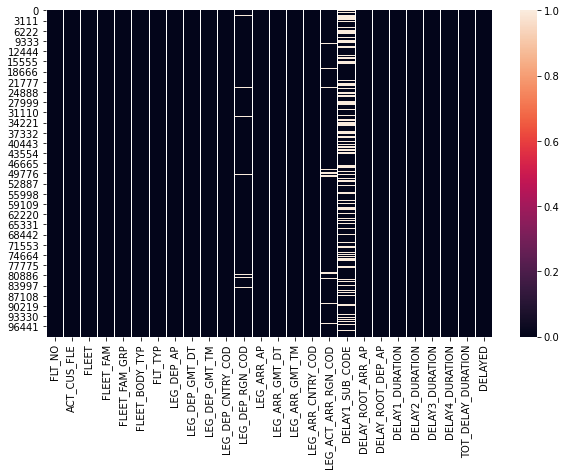

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())

/Users/zehraballi/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zehraballi/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zehraballi/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

/Users/zehraballi/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


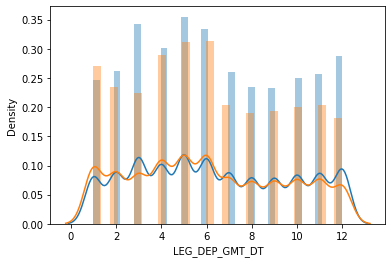

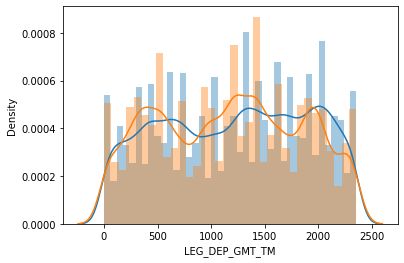

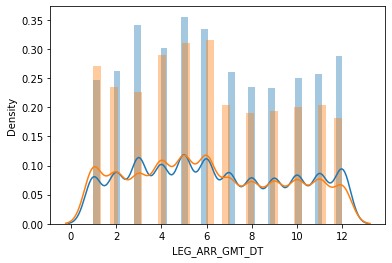

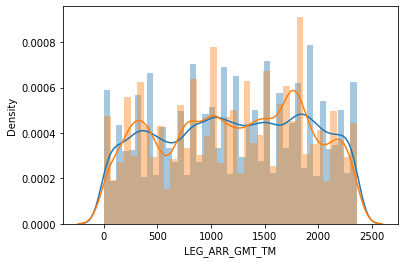

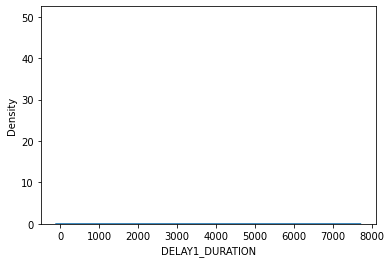

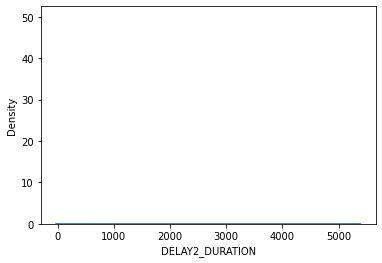

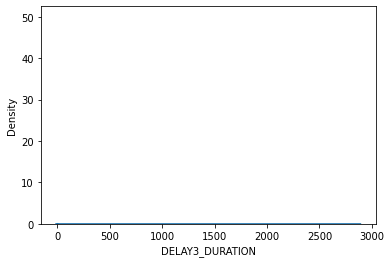

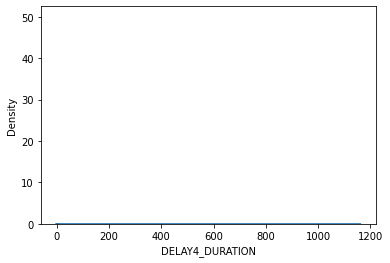

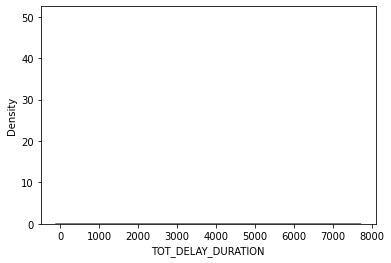

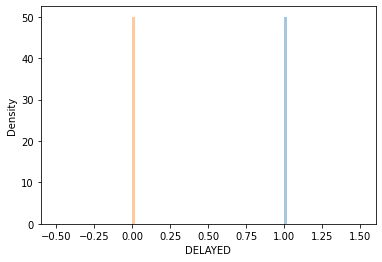

In [42]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df_delayed[col], label="delayed")
    sns.distplot(df_nondelayed[col], label="non delayed")

In [43]:
df.shape

(99546, 26)

In [44]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(np.NAN,'ND')

In [45]:
df['DELAY1_SUB_CODE'].unique()

array(['ND', '2', 'CF', 'OP'], dtype=object)

In [46]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace('2','GN')

In [47]:
df.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,LEG_ACT_ARR_RGN_COD,DELAY1_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAYED
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,ND,?,?,0,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,FE,ND,?,?,0,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,ND,?,?,0,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,15,...,FE,ND,?,?,0,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,5,12,...,FE,ND,?,?,0,0,0,0,0,0


In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

<AxesSubplot:>

In [ ]:
df['DELAY1_DURATION'].value_counts().plot.pie()

In [ ]:
df['LEG_DEP_AP'].unique()

In [ ]:
df["LEG_ACT_ARR_RGN_COD"].value_counts()

In [ ]:
df["LEG_ACT_ARR_RGN_COD"].isna().value_counts()

In [ ]:
df["LEG_ACT_ARR_RGN_COD"]=df["LEG_ACT_ARR_RGN_COD"].replace(np.NAN,"DO")

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

In [ ]:
df.columns

In [ ]:
df['LEG_DEP_RGN_COD'].value_counts()

In [ ]:
df['LEG_DEP_RGN_COD'].isna().value_counts()

In [ ]:
df['LEG_DEP_RGN_COD']=df['LEG_DEP_RGN_COD'].replace(np.NAN,"DO")

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

In [ ]:
df.head()

In [ ]:
df["FLEET"].value_counts()

In [ ]:
df["FLEET_FAM"].value_counts()

In [ ]:
df["FLEET_FAM_GRP"].value_counts()

In [ ]:
df["FLT_NO"].value_counts()

In [ ]:
df["ACT_CUS_FLE"].value_counts()

In [ ]:
df["FLEET"].value_counts()

In [ ]:
df.corr()

In [ ]:
df.drop(["LEG_ARR_GMT_TM","LEG_ARR_GMT_DT"], axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df["DELAY_ROOT_ARR_AP"].value_counts()

In [ ]:
df["DELAY_ROOT_DEP_AP"].value_counts()

In [ ]:
df.drop(["DELAY_ROOT_DEP_AP","DELAY_ROOT_ARR_AP"], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
df.drop(["DELAY1_DURATION","DELAY2_DURATION","DELAY3_DURATION","DELAY4_DURATION"], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df["DELAY1_SUB_CODE"].value_counts()

In [ ]:
df.drop(["LEG_ARR_AP","LEG_ARR_CNTRY_COD","LEG_ACT_ARR_RGN_COD"], axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
df["FLT_NO"].value_counts().plot.pie()

In [ ]:
df["ACT_CUS_FLE"].value_counts().plot.pie()

In [ ]:
df.drop("FLT_NO", axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(8,8))
df["FLEET"].value_counts().plot.pie()

In [ ]:
df["FLEET_FAM"].value_counts().plot.pie()

In [ ]:
df["FLEET_FAM_GRP"].value_counts().plot.pie()

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
obs=df[["FLEET_FAM_GRP","FLEET_FAM"]]
#chi2_contingency(obs)


In [ ]:
df[["FLEET_FAM_GRP","FLEET_FAM"]]

In [ ]:
obs.info()

In [ ]:
crosstab = pd.crosstab(df["FLEET_FAM_GRP"], df["FLEET_FAM"])
crosstab

In [ ]:
import scipy.stats as stats

In [ ]:
stats.chi2_contingency(crosstab)

In [ ]:
df.head()

In [ ]:
#Feature Selection for Categorical values - chi square testing
#First-->label encoding before chi square testing

In [ ]:
ordinal_label={k: i for i, k in enumerate(df["ACT_CUS_FLE"].unique(),1)}

In [ ]:
ordinal_label

In [ ]:
df["ACT_CUS_FLE"]=df["ACT_CUS_FLE"].map(ordinal_label)

In [ ]:
df.tail()

In [ ]:
df.columns

In [ ]:
ordinal_label1={k: i for i, k in enumerate(df['FLEET'].unique(),1)}

In [ ]:
ordinal_label2={k: i for i, k in enumerate(df['FLEET_FAM'].unique(),1)}
ordinal_label3={k: i for i, k in enumerate(df['FLEET_FAM_GRP'].unique(),1)}
ordinal_label4={k: i for i, k in enumerate(df['FLEET_BODY_TYP'].unique(),1)}
ordinal_label5={k: i for i, k in enumerate(df['FLT_TYP'].unique(),1)}
ordinal_label6={k: i for i, k in enumerate(df['LEG_DEP_AP'].unique(),1)}
ordinal_label7={k: i for i, k in enumerate(df['LEG_DEP_CNTRY_COD'].unique(),1)}
ordinal_label8={k: i for i, k in enumerate(df['LEG_DEP_RGN_COD'].unique(),1)}
ordinal_label9={k: i for i, k in enumerate(df['DELAY1_SUB_CODE'].unique(),1)}


In [ ]:
df['FLEET']=df['FLEET'].map(ordinal_label1)
df['FLEET_FAM']=df['FLEET_FAM'].map(ordinal_label2)
df['FLEET_FAM_GRP']=df['FLEET_FAM_GRP'].map(ordinal_label3)
df['FLEET_BODY_TYP']=df['FLEET_BODY_TYP'].map(ordinal_label4)
df['FLT_TYP']=df['FLT_TYP'].map(ordinal_label5)
df['LEG_DEP_AP']=df['LEG_DEP_AP'].map(ordinal_label6)
df['LEG_DEP_CNTRY_COD']=df['LEG_DEP_CNTRY_COD'].map(ordinal_label7)
df['LEG_DEP_RGN_COD']=df['LEG_DEP_RGN_COD'].map(ordinal_label8)
df['DELAY1_SUB_CODE']=df['DELAY1_SUB_CODE'].map(ordinal_label9)


In [ ]:
df.head()

In [ ]:
df.drop(['FLEET', 'FLEET_FAM', 'FLEET_FAM_GRP'],axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("DELAYED", axis=1), df["DELAYED"], test_size=0.33, random_state=42)

In [ ]:
X_train.isnull().sum()

In [ ]:
f_p_values= chi2(X_train,y_train)
f_p_values

In [ ]:
f_scores=pd.Series(f_p_values[0])
p_values=pd.Series(f_p_values[1])

In [ ]:
f_scores.sort_index(ascending=True)


In [ ]:
f_scores.sort_values(ascending=False)

In [ ]:
p_values.sort_values(ascending=True)

In [ ]:
p_values.sort_index(ascending=True)

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(X_train.corr(),annot=True)